<a href="https://colab.research.google.com/github/AntonioSanabria26/FisicaComputacional1/blob/master/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BIBLIOTECAS UTILIZADAS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **LEYENDOS DATOS CSV MODIFICADOS**

In [2]:
#----------- LEYENDO EL URL, DONDE EL ARCHIVO ESTA EN FORMATO CSV -------------#

URL = "https://raw.githubusercontent.com/AntonioSanabria26/FisicaComputacional1/master/Actividad1/26179.csv"
df = pd.read_csv( URL )

#--------------------------- ESTRUCTURA DEL TEXTO -----------------------------#

df = df.drop(range(0,17),axis=0)
df = df.drop([8108,8109])
# ELIMINACIÓN DE LAS PRIMERAS 17 LINEAS
df = df.dropna() 
# ELIMINACION DE LAS FILAS CON N/A
df = df.replace(to_replace= "Nulo" ,value = "N/A",regex= True )
# REMPLAZANDO LOS "Nulo" , por N/A

df = df["CNA-SMN-CG-GMC-SMAA-CLIMATOLOGIA"].str.split("\s+", n=5, expand=True)
#SEPARANDO LA CADENA DE TEXTO EN 5 COLUMNAS, CON SPLIT DE ESPACIO+, PARA QUE
#PUEDA TOMAR VALORES ENCIMA DE 1 ESPACIO DE LA MEMORIA

df.columns = ['Fecha', 'Precipitacion', 'Evaporacion', 'Tmax', 'Tmin']
#NOMBRE DE LAS COLUMNAS

df_columns =['Precipitacion', 'Evaporacion', 'Tmax', 'Tmin']
for i in df_columns:
  df[i] = pd.to_numeric( df[i] ,errors = "coerce")
#CONVIRTIENDO LAS COLUMNAS df_columns A FLOTANTES

df["Fecha"] = pd.to_datetime(df["Fecha"],dayfirst=True).copy()
df["Año"] = df["Fecha"].dt.year
df["Mes"] =df["Fecha"].dt.month
# CONVIRTIENDO LA FECHA 

df

,Fecha,Precipitacion,Evaporacion,Tmax,Tmin,Año,Mes
18,1974-07-01,0.0,7.3,35.0,22.0,1974,7
19,1974-07-02,0.0,10.5,34.0,22.5,1974,7
20,1974-07-03,0.0,13.6,31.5,21.0,1974,7
21,1974-07-04,0.0,10.7,41.0,28.0,1974,7
22,1974-07-05,0.0,10.9,35.0,28.0,1974,7
...,...,...,...,...,...,...,...
8103,2016-04-25,0.0,5.8,24.0,2.0,2016,4
8104,2016-04-26,0.0,7.4,25.0,13.0,2016,4
8105,2016-04-27,0.0,5.8,23.5,8.0,2016,4
8106,2016-04-28,0.0,5.7,23.0,7.5,2016,4


# **EXPLORACION DE DATOS CON MATPLOTLIB Y SEABORNS**

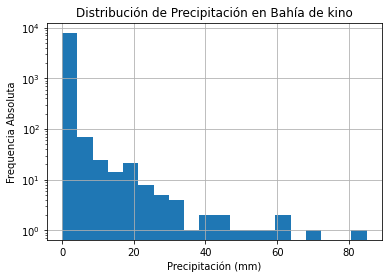

In [3]:
#GRAFICA DE HISTOGRAMA DE PRECIPITACION CON MATPLOTLIB
plt.hist(df.Precipitacion, bins=20)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.yscale("log")
plt.title('Distribución de Precipitación en Bahía de kino')
plt.grid()
plt.show()

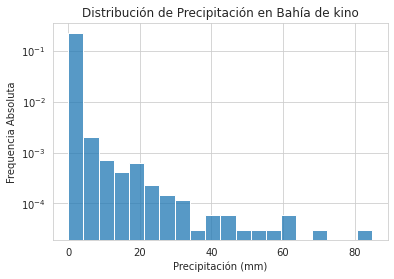

In [4]:
#GRAFICA DE HISTOGRAMA DE PRECIPITACION CON SEABORNS

sns.set_style('whitegrid') 
plt.xlabel('Precipitación (mm)') 
plt.ylabel('Frequencia Absoluta') 
plt.title('Distribución de Precipitación en Bahía de kino') 
sns.histplot(data= df, x='Precipitacion', bins=20,log_scale=(False,True), stat= "density")


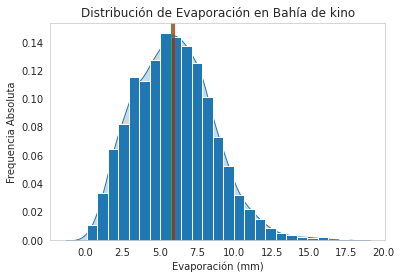

In [5]:
#GRAFICA DE HISTOGRAMA DE EVAPORACION CON MATPLOTLIB
plt.hist(df.Evaporacion, bins=25,density=True)
plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Evaporación en Bahía de kino')
plt.grid()

Evapprom = df.Evaporacion.mean()
Evapmediana = df.Evaporacion.median()
#PROMEDIO Y MEDIANA

plt.axvline(Evapprom , color = "r")
plt.axvline(Evapmediana , color = "g")

sns.kdeplot(df.Evaporacion, fill=True);
#GRÁFICA DE DENSIDAD

plt.show()

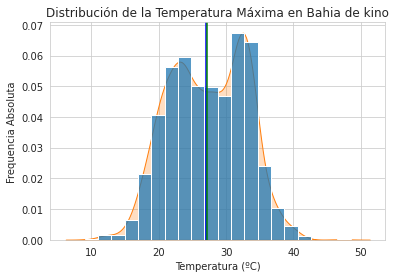

In [6]:
#GRAFICA DE HISTOGRAMA DE TEMPERATURA MÁXIMA CON SEABORNS

# GRAFICA DE LA TEMPERATURA MAXIMA
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df.Tmax.median() 
Tprom = df.Tmax.mean()

sns.histplot(data=df, x='Tmax', bins=20, stat="density");
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Tmed, color = 'b', label = 'm') 
plt.axvline(x = Tprom, color = 'g', label = 'x')

sns.kdeplot(df.Tmax, fill=True);

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en Bahia de kino')

plt.show()

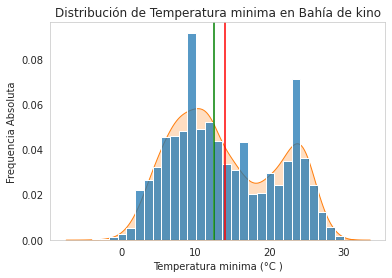

In [7]:
#GRAFICA DE HISTOGRAMA DE TEMPERATURA MINIMA CON SEABORN

sns.histplot(data=df, x="Tmin", stat="density")
plt.xlabel('Temperatura minima (°C )')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Temperatura minima en Bahía de kino')
plt.grid()

Tminprom = df.Tmin.mean()
Tminmediana = df.Tmin.median()
#PROMEDIO Y MEDIANA

plt.axvline(Tminprom , color = "r")
plt.axvline(Tminmediana , color = "g")

sns.kdeplot(df.Tmin, fill=True);
#GRÁFICA DE DENSIDAD

plt.show()

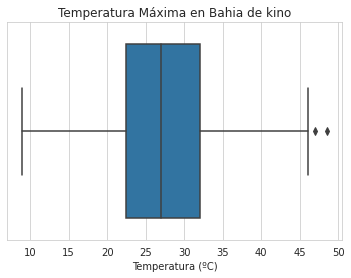

In [8]:
#GRAFICA DE TMAX TIPO BOXPLOT DE SEABORNS

sns.set_style("whitegrid")

sns.boxplot(x=df.Tmax, data=df, orient='h').set(xlabel='Temperatura (ºC)', 
              title='Temperatura Máxima en Bahia de kino');



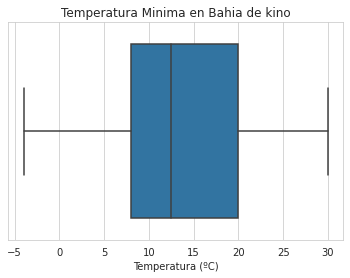

In [9]:
#GRAFICA DE TMIN TIPO BOXPLOT DE SEABORNS

sns.set_style("whitegrid")

sns.boxplot(x=df.Tmin, data=df, orient='h').set(xlabel='Temperatura (ºC)', 
              title='Temperatura Minima en Bahia de kino');

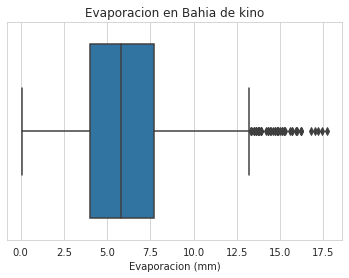

In [13]:
#GRAFICA DE EVAPORACION TIPO BOXPLOT DE SEABORNS

sns.set_style("whitegrid")

sns.boxplot(x=df.Evaporacion, data=df, orient='h').set(xlabel='Evaporacion (mm)', 
              title='Evaporacion en Bahia de kino');

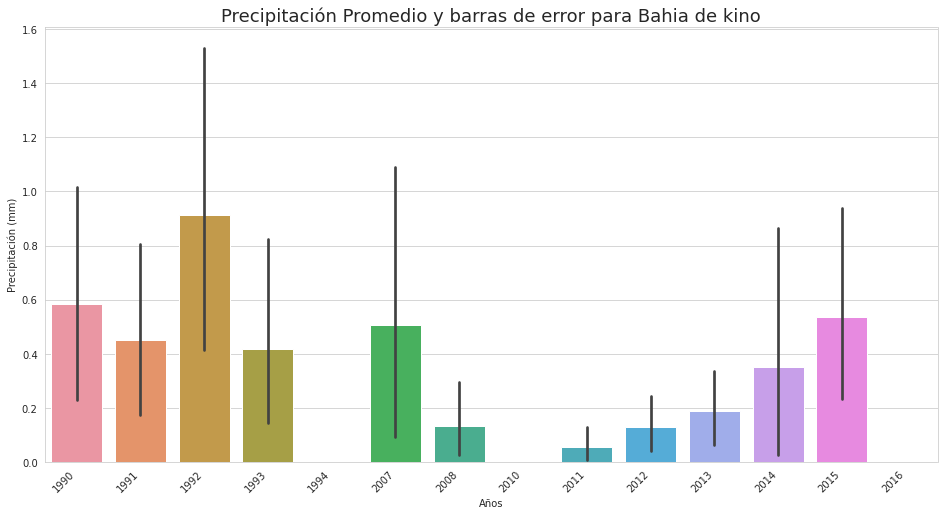

In [15]:
# SELECCION DE DATOS DE 30 EN 30 AÑOS 
df_30 = df[(df['Año'] >= 1930) & (df['Año'] < 1960)]
df_60 = df[(df['Año'] >= 1960) & (df['Año'] < 1990)]
df_90 = df[(df['Año'] >= 1990) & (df['Año'] < 2017)]

#GRAFICA DE PRECIPITACION DE LOS ULTIMOS 30 AÑOS EN AÑOS
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g = sns.barplot(x='Año', y='Precipitacion', data= df_90);
# ROTACION DE 45º LOS AÑOS EN EL EJE X PARA MEJOR LECTURA
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Bahia de kino', fontsize=18)

plt.show()

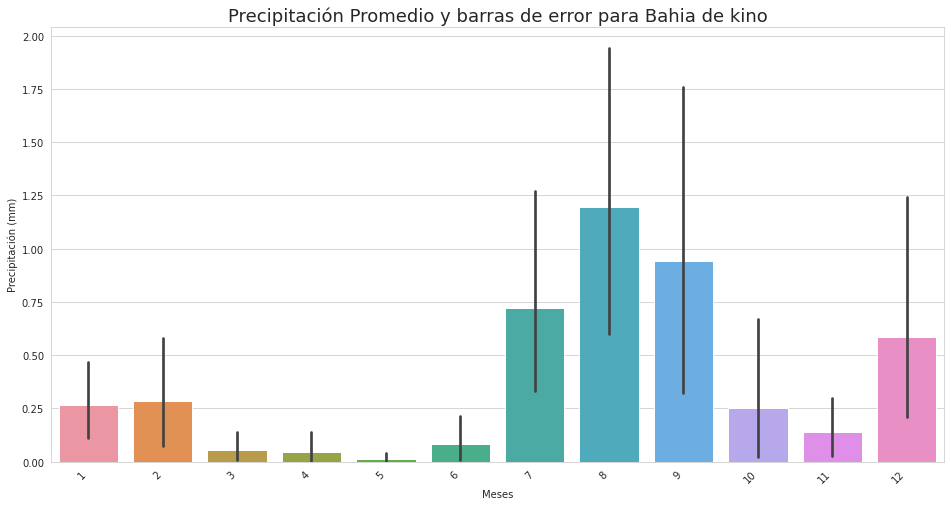

In [17]:
#GRAFICA DE PRECIPITACION DE LOS ULTIMOS 30 AÑOS EN MESES
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g = sns.barplot(x='Mes', y='Precipitacion', data= df_90);
# ROTACION DE 45º LOS AÑOS EN EL EJE X PARA MEJOR LECTURA
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Bahia de kino', fontsize=18)

plt.show()

 
 PODEMOS OBSERVAR ESA LINEA RECTA, YA QUE ENTRE LOS AÑOS 1994 Y 2007 NO HAY DATOS
 


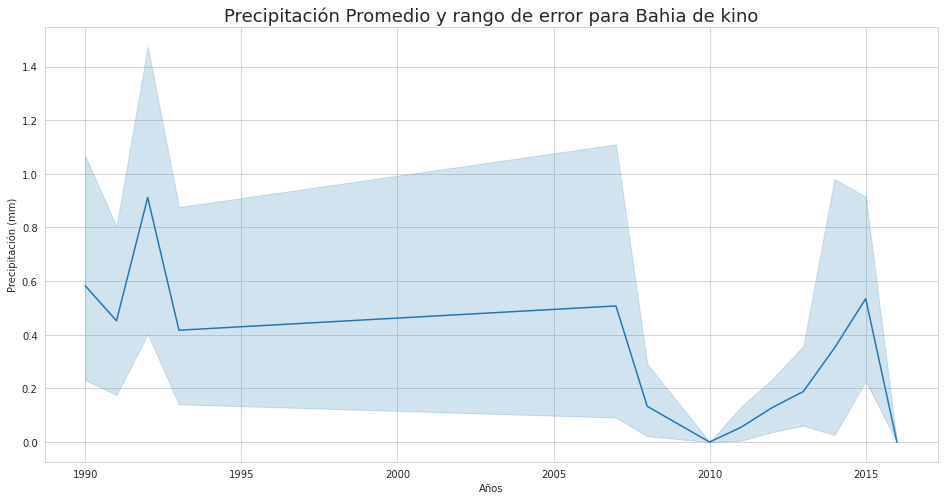

In [11]:
# GRAFICA DE PRECIPITACION DE LOS ULTIMOS 30 AÑOS
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precipitacion', data=df_90);

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Bahia de kino', fontsize=18)


print (" ")
print (" PODEMOS OBSERVAR ESA LINEA RECTA, YA QUE ENTRE LOS AÑOS 1994 Y 2007 NO HAY DATOS")
print (" ")
plt.show()

 
 PODEMOS OBSERVAR ESA LINEA RECTA, YA QUE ENTRE LOS AÑOS 1994 Y 2007 NO HAY DATOS
 


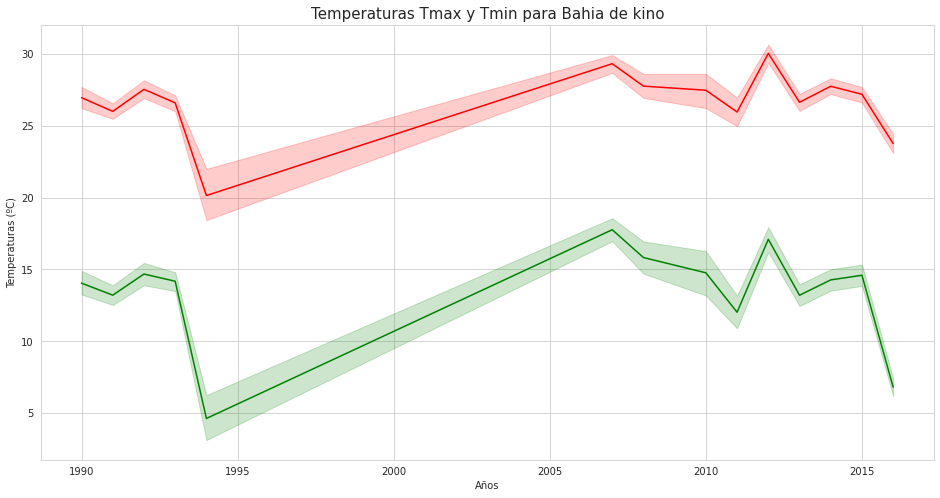

In [12]:
# GRAFICA DE TEMPERATURA DE LOS ULTIMOS 30 AÑOS
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_90, color = 'r');
sns.lineplot(x='Año', y='Tmin', data=df_90, color = "g");

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Bahia de kino', fontsize=15)


print (" ")
print (" PODEMOS OBSERVAR ESA LINEA RECTA, YA QUE ENTRE LOS AÑOS 1994 Y 2007 NO HAY DATOS")
print (" ")
plt.show()